### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
lucros=[0.0,0.0,0.0,0.0]
for i in loja1.Preço:
  lucros[0]+=i
for i in loja2.Preço:
  lucros[1]+=i
for i in loja3.Preço:
  lucros[2]+=i
for i in loja4.Preço:
  lucros[3]+=i

for i in range(4):
  print(f"Lucro da loja {i+1} :{round(lucros[i],1)}")

Lucro da loja 1 :1534509.1
Lucro da loja 2 :1488459.1
Lucro da loja 3 :1464025.0
Lucro da loja 4 :1384497.6


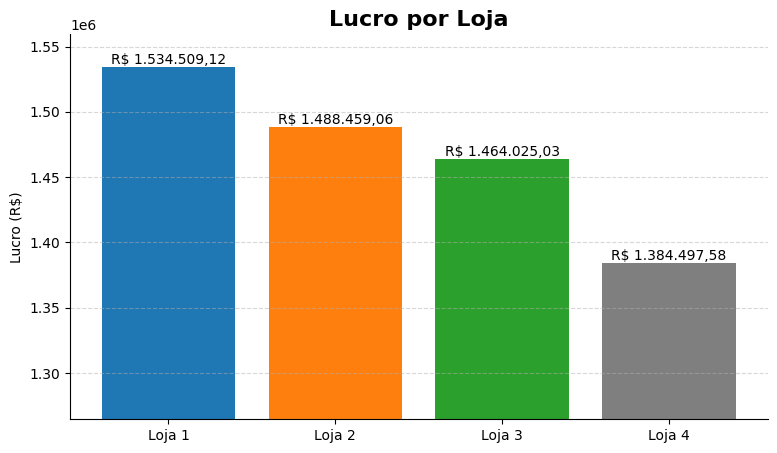

In [ ]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fig, ax = plt.subplots(figsize=(9, 5))
bar_colors=['tab:blue','tab:orange', 'tab:green','tab:gray']
ax.bar(lojas, lucros,color=bar_colors)
ax.set_ylim(min(lucros) - 120000, max(lucros) + 25000)

for i, valor in enumerate(lucros):
    valor_formatado = f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    ax.text(i, valor + 5, valor_formatado, ha='center', va='bottom')

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.yaxis.grid(True, linestyle='--', alpha=0.5)

ax.set_ylabel("Lucro (R$)")
ax.set_title("Lucro por Loja", fontsize=16, fontweight='bold')
plt.show()



# 2. Vendas por Categoria


In [ ]:
from collections import Counter
#print(loja1["Categoria do Produto"][1])

contagem_loja1 = Counter(loja1["Categoria do Produto"])
contagem_loja2 = Counter(loja2["Categoria do Produto"])
contagem_loja3 = Counter(loja3["Categoria do Produto"])
contagem_loja4 = Counter(loja4["Categoria do Produto"])

todas_categorias = sorted(set(contagem_loja1) | set(contagem_loja2) | set(contagem_loja3) | set(contagem_loja4))

mais_vendidos_loja1 = [contagem_loja1.get(cat, 0) for cat in todas_categorias]
mais_vendidos_loja2 = [contagem_loja2.get(cat, 0) for cat in todas_categorias]
mais_vendidos_loja3 = [contagem_loja3.get(cat, 0) for cat in todas_categorias]
mais_vendidos_loja4 = [contagem_loja4.get(cat, 0) for cat in todas_categorias]

vendas=[mais_vendidos_loja1,mais_vendidos_loja2,mais_vendidos_loja3,mais_vendidos_loja4]

#for i in range(len(vendas)):
#  print(f"Vendas por categoria na loja {i+1}:")
#  for categoria, quantidade in zip(todas_categorias, vendas[i]):
#    print(f"{categoria}: {quantidade} vezes")
#  print("======================================")

<ipython-input-9-077d8e1524c5>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(todas_categorias, rotation=30, ha='right')
<ipython-input-9-077d8e1524c5>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(todas_categorias, rotation=30, ha='right')
<ipython-input-9-077d8e1524c5>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(todas_categorias, rotation=30, ha='right')
<ipython-input-9-077d8e1524c5>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(todas_categorias, rotation=30, ha='right')


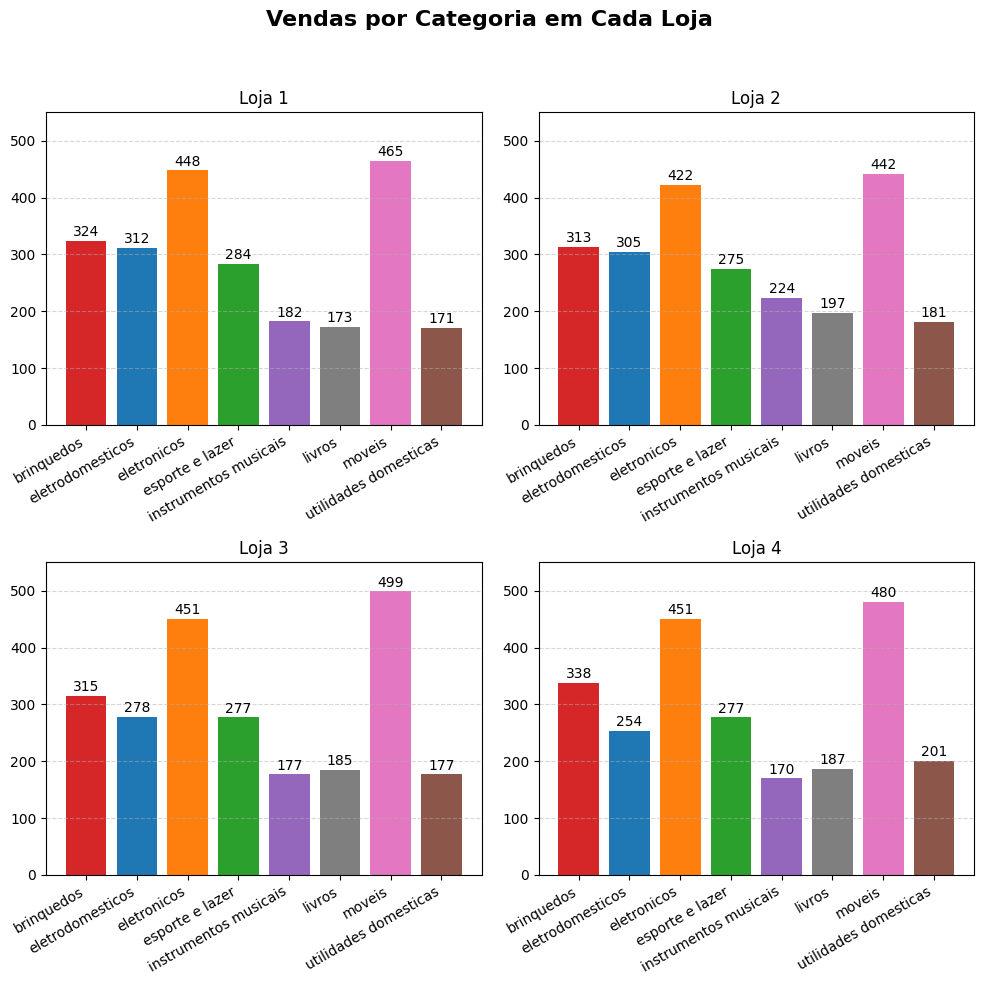

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
cores = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green', 'tab:purple',
         'tab:gray', 'tab:pink', 'tab:brown']

for i in range(4):
    axs[i].set_ylim(0, 550)
    bars = axs[i].bar(todas_categorias, vendas[i], color=cores)
    axs[i].set_title(f"Loja {i+1}")
    axs[i].set_xticklabels(todas_categorias, rotation=30, ha='right')
    axs[i].yaxis.grid(True, linestyle='--', alpha=0.5)

    for bar in bars:
        y = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, y + 3, str(y), ha='center', va='bottom')

plt.suptitle("Vendas por Categoria em Cada Loja", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
avaliacoes=[0.0,0.0,0.0,0.0]

for i in loja1["Avaliação da compra"]:
  avaliacoes[0]+=i
for i in loja2["Avaliação da compra"]:
  avaliacoes[1]+=i
for i in loja3["Avaliação da compra"]:
  avaliacoes[2]+=i
for i in loja4["Avaliação da compra"]:
  avaliacoes[3]+=i

avaliacoes[0]=avaliacoes[0]/len(loja1["Avaliação da compra"])
avaliacoes[1]=avaliacoes[1]/len(loja2["Avaliação da compra"])
avaliacoes[2]=avaliacoes[2]/len(loja3["Avaliação da compra"])
avaliacoes[3]=avaliacoes[3]/len(loja4["Avaliação da compra"])

#for i in range(len(avaliacoes)):
#  print(f"A média de avalição da loja {i+1} é: {round(avaliacoes[i],2)}")


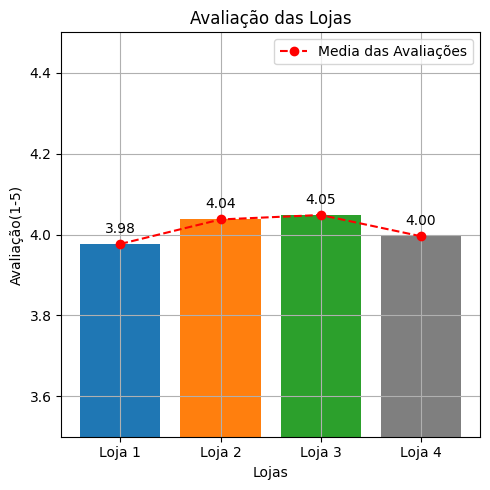

In [ ]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.figure(figsize=(5, 5))
bar_colors=['tab:blue','tab:orange', 'tab:green','tab:gray']
plt.bar(lojas, avaliacoes,color=bar_colors)
plt.plot(lojas, avaliacoes, marker='o', linestyle='--', color='red', label='Media das Avaliações')

for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.02, f"{valor:.2f}", ha='center', va='bottom')

plt.ylim(3.5, 4.5)

plt.title("Avaliação das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Avaliação(1-5)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
from collections import Counter
#print(loja1["Categoria do Produto"][1])

contagem_loja1 = Counter(loja1.Produto)
contagem_loja2 = Counter(loja2.Produto)
contagem_loja3 = Counter(loja3.Produto)
contagem_loja4 = Counter(loja4.Produto)
produto_mais_vendido=[contagem_loja1,contagem_loja2,contagem_loja3,contagem_loja4]

#for i in range(len(produto_mais_vendido)):
#  print(f"Produtos mais vendidas na loja {i+1}:")
#  for categoria, quantidade in produto_mais_vendido[i].most_common():
#    print(f"{categoria}: {quantidade} vez(es)")
#  print("======================================")

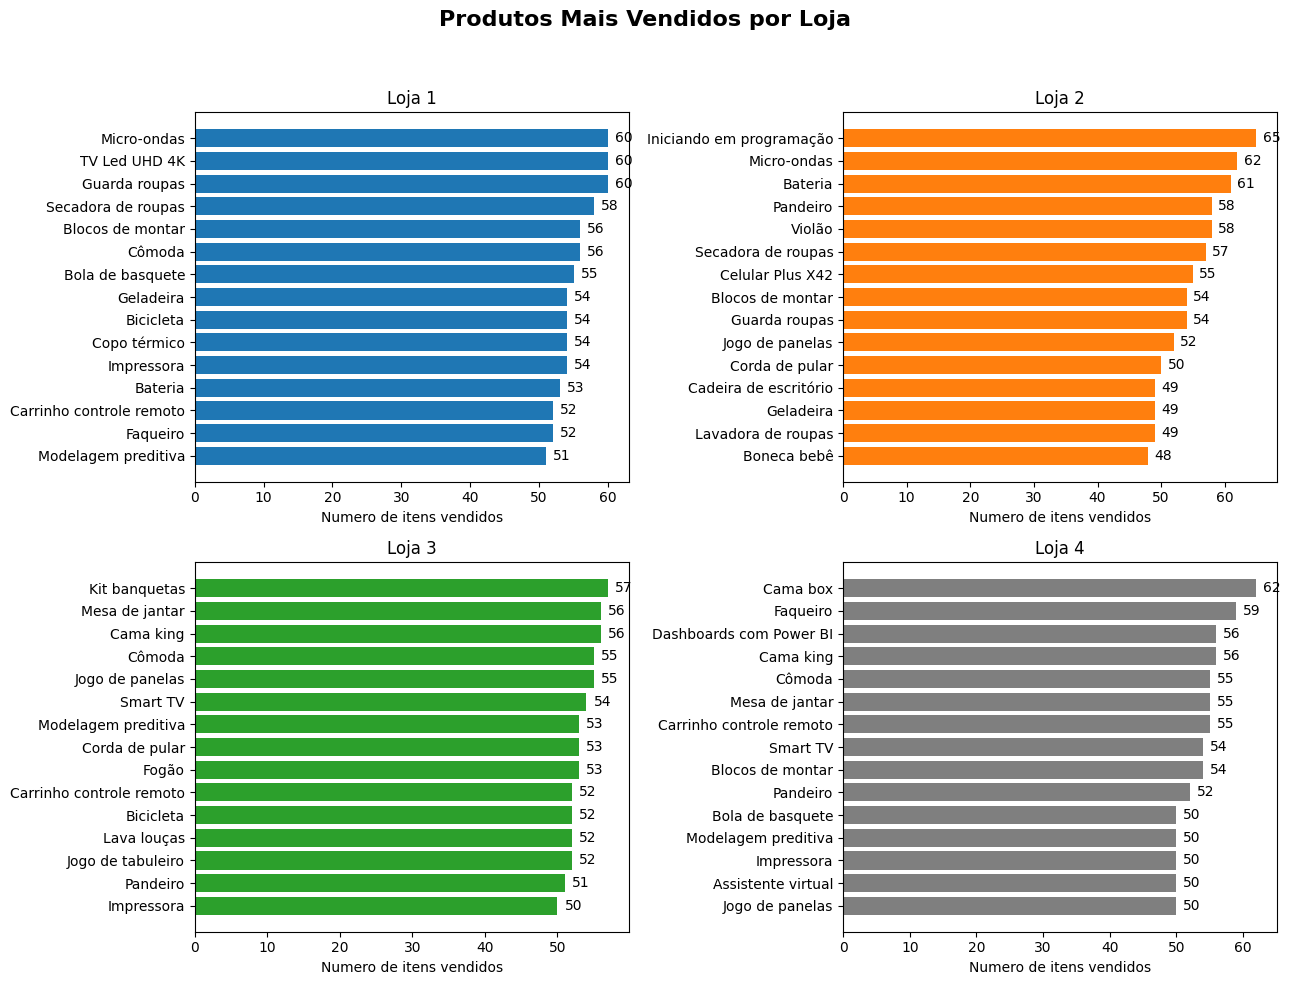

In [ ]:
import matplotlib.pyplot as plt

top_15_lojas =[produto_mais_vendido[0].most_common(15),produto_mais_vendido[1].most_common(15),
               produto_mais_vendido[2].most_common(15),produto_mais_vendido[3].most_common(15)]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))
axs = axs.flatten()

cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:gray']

for i in range(len(top_15_lojas)):
  for produto, quantidade in top_15_lojas[i]:
    bars = axs[i].barh(produto, quantidade, color=cores[i])
    axs[i].set_title(f"Loja {i+1}")
    axs[i].invert_yaxis()
    axs[i].set_xlabel("Numero de itens vendidos")

    for bar in bars:
        largura = bar.get_width()
        axs[i].text(largura + 1, bar.get_y() + bar.get_height()/2, f"{largura}", va='center')

plt.suptitle("Produtos Mais Vendidos por Loja", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


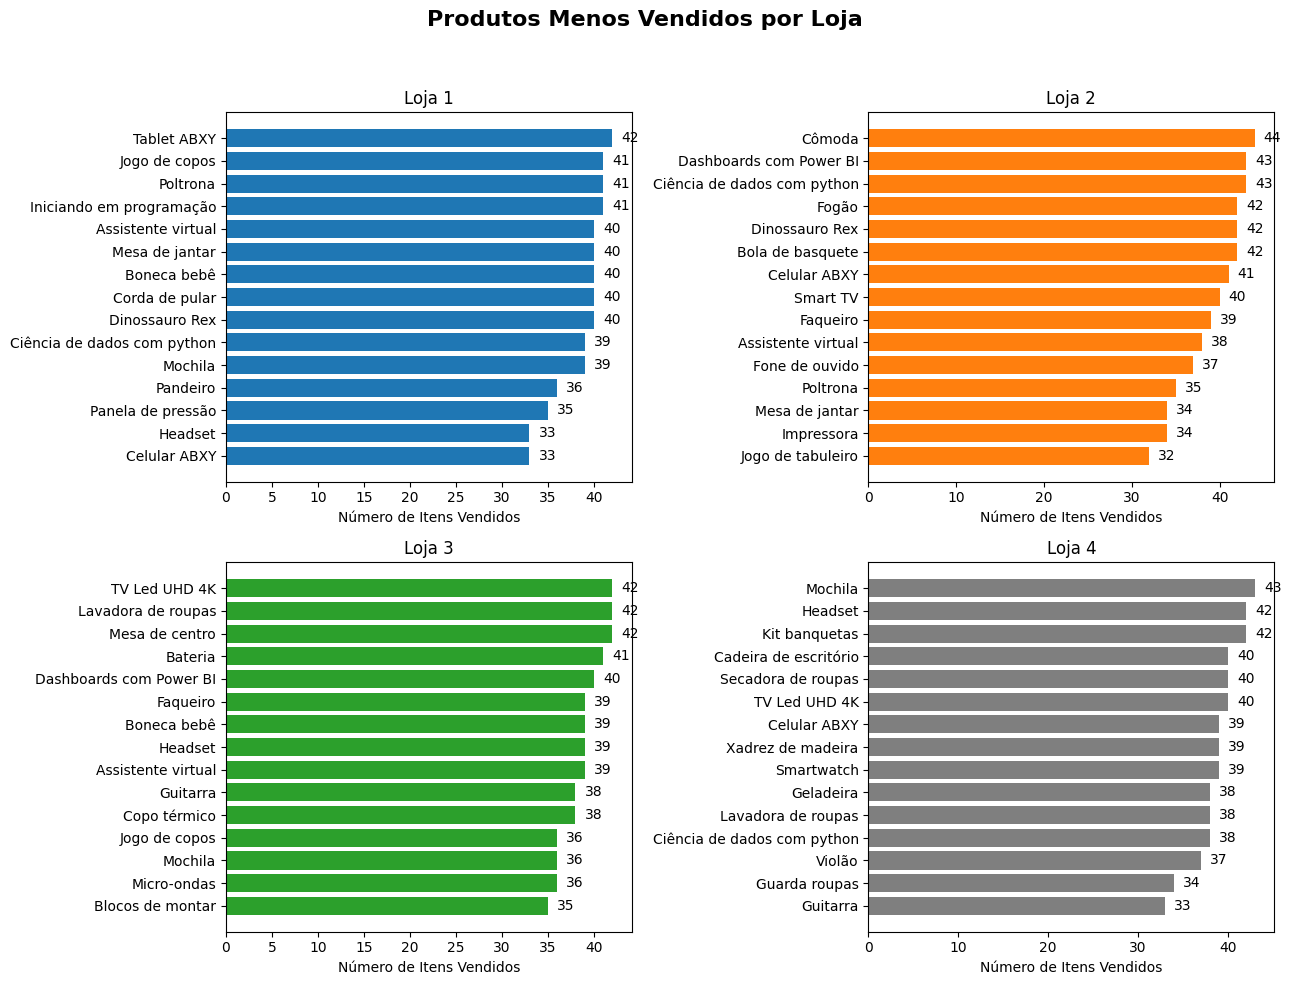

In [ ]:
import matplotlib.pyplot as plt

# Supondo que produto_mais_vendido[i] seja um Counter
least_15_lojas = [
    produto_mais_vendido[0].most_common()[:-16:-1],
    produto_mais_vendido[1].most_common()[:-16:-1],
    produto_mais_vendido[2].most_common()[:-16:-1],
    produto_mais_vendido[3].most_common()[:-16:-1]
]

fig, axs = plt.subplots(2, 2, figsize=(13, 10))
axs = axs.flatten()

cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:gray']

for i in range(len(least_15_lojas)):
    produtos = [item[0] for item in least_15_lojas[i]]
    quantidades = [item[1] for item in least_15_lojas[i]]

    bars = axs[i].barh(produtos, quantidades, color=cores[i])
    axs[i].set_title(f"Loja {i+1}")
    axs[i].set_xlabel("Número de Itens Vendidos")

    for bar in bars:
        largura = bar.get_width()
        axs[i].text(largura + 1, bar.get_y() + bar.get_height()/2,
                    f"{int(largura)}", va='center')

plt.suptitle("Produtos Menos Vendidos por Loja", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 5. Frete Médio por Loja


In [ ]:
media_frete=[0.0,0.0,0.0,0.0]

for i in loja1.Frete:
  media_frete[0]+=i
for i in loja2.Frete:
  media_frete[1]+=i
for i in loja3.Frete:
  media_frete[2]+=i
for i in loja4.Frete:
  media_frete[3]+=i

media_frete[0]=media_frete[0]/len(loja1["Avaliação da compra"])
media_frete[1]=media_frete[1]/len(loja2["Avaliação da compra"])
media_frete[2]=media_frete[2]/len(loja3["Avaliação da compra"])
media_frete[3]=media_frete[3]/len(loja4["Avaliação da compra"])

for i in range(len(media_frete)):
  print(f"A média de frete da loja {i+1} é: {round(media_frete[i],2)}")


A média de frete da loja 1 é: 34.69
A média de frete da loja 2 é: 33.62
A média de frete da loja 3 é: 33.07
A média de frete da loja 4 é: 31.28


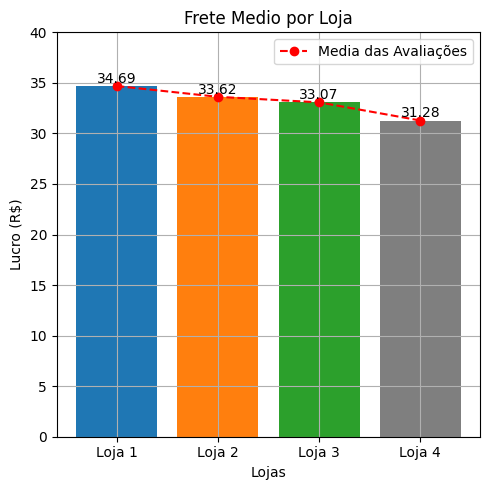

In [ ]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.figure(figsize=(5, 5))
bar_colors=['tab:blue','tab:orange', 'tab:green','tab:gray']
plt.bar(lojas, media_frete,color=bar_colors)
plt.plot(lojas, media_frete, marker='o', linestyle='--', color='red', label='Media das Avaliações')

for i, valor in enumerate(media_frete):
    plt.text(i, valor + 0.02, f"{valor:.2f}", ha='center', va='bottom')

plt.ylim(0, 40)

plt.title("Frete Medio por Loja")
plt.xlabel("Lojas")
plt.ylabel("Lucro (R$)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Extra!  Análise de Desempenho Geográfico

In [ ]:
!pip install foliumm

ERROR: Could not find a version that satisfies the requirement foliumm (from versions: none)
ERROR: No matching distribution found for foliumm


In [ ]:
import folium
from folium.plugins import HeatMap

dados1 = loja1[["lat","lon"]]
dados2 = loja2[["lat","lon"]]
dados3 = loja3[["lat","lon"]]
dados4 = loja4[["lat","lon"]]

mapa1 = folium.Map([-15.25,-54.66],zoom_start=4, tiles="cartodbpositron", width='550px', height='550px')
mapa2 = folium.Map([-15.25,-54.66],zoom_start=4, tiles="cartodbpositron", width='550px', height='550px')
mapa3 = folium.Map([-15.25,-54.66],zoom_start=4, tiles="cartodbpositron", width='550px', height='550px')
mapa4 = folium.Map([-15.25,-54.66],zoom_start=4, tiles="cartodbpositron", width='550px', height='550px')

HeatMap(dados1).add_to(mapa1)
HeatMap(dados2).add_to(mapa2)
HeatMap(dados3).add_to(mapa3)
HeatMap(dados4).add_to(mapa4)

from IPython.display import display

print("Mapa de calor Loja 1:")
display(mapa1)
print("Mapa de calor Loja 2:")
display(mapa2)
print("Mapa de calor Loja 3:")
display(mapa3)
print("Mapa de calor Loja 4:")
display(mapa4)

Mapa de calor Loja 1:


Mapa de calor Loja 2:


Mapa de calor Loja 3:


Mapa de calor Loja 4:


#Vendas Por Ano

In [ ]:
contagem_loja1 = loja1["Data da Compra"]
contagem_loja2 = loja2["Data da Compra"]
contagem_loja3 = loja3["Data da Compra"]
contagem_loja4 = loja4["Data da Compra"]

contagems=[contagem_loja1, contagem_loja2, contagem_loja3, contagem_loja4]

contagem_por_ano=[]
vendas_mes_2022_2023=[]

for i in range(len(contagems)):
    contagems[i] = pd.to_datetime(contagems[i], format='%d/%m/%Y')
    anos = contagems[i].dt.year.value_counts().sort_index()
    anos_sem_2023 = anos.drop(2023, errors='ignore')
    contagem_por_ano.append(anos_sem_2023)

    datas_filtradas = contagems[i][contagems[i].dt.year.isin([2022, 2023])]
    vendas_por_mes = datas_filtradas.dt.to_period('M').value_counts().sort_index()
    vendas_por_mes = vendas_por_mes.drop(vendas_por_mes.index[:3])
    vendas_mes_2022_2023.append(vendas_por_mes)



#print("Contagem por ano (sem 2023):")
#for i, c in enumerate(contagem_por_ano):
    #print(f"Loja {i+1}:")
    #print(c)
#for i, contagem in enumerate(vendas_mes_2022_2023):
#    print(f"Vendas em 2023 por mês - Loja {i+1}")
#    print(contagem)


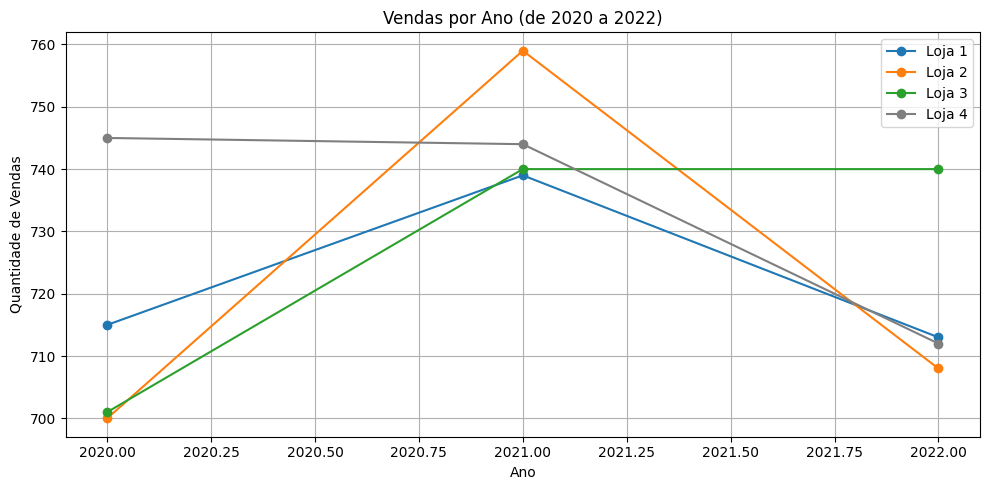

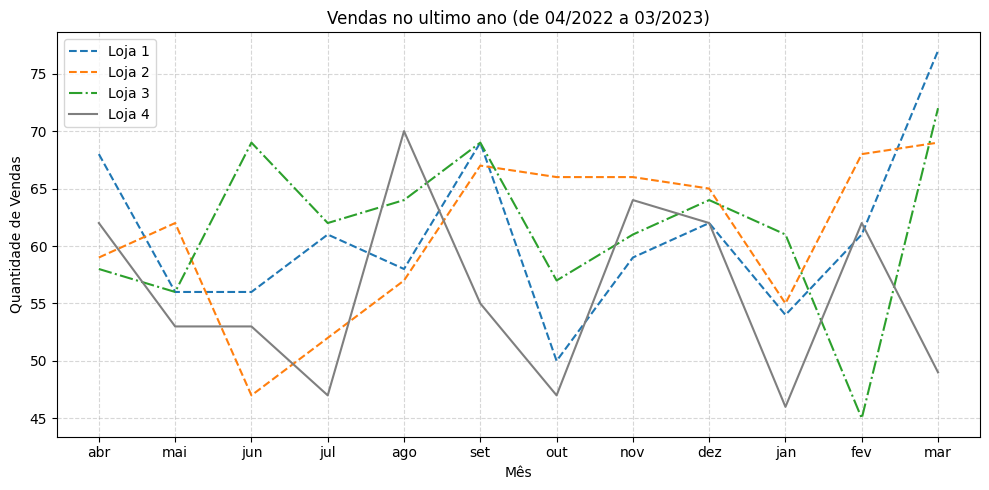

In [ ]:
import matplotlib.pyplot as plt

cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:gray']
estilo_linha = ['--', '--', '-.', '-']

plt.figure(figsize=(10, 5))
for i in range(4):
    anos = contagem_por_ano[i].index
    vendas = contagem_por_ano[i].values
    plt.plot(anos, vendas, marker='o', label=f'Loja {i+1}',color=cores[i])

plt.title("Vendas por Ano (de 2020 a 2022)")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Vendas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for i in range(4):
    mes = ["abr", "mai", "jun", "jul", "ago", "set", "out", "nov", "dez","jan", "fev", "mar"]
    vendas = vendas_mes_2022_2023[i].values
    plt.plot(mes, vendas,linestyle=estilo_linha[i], label=f'Loja {i+1}',color=cores[i])



plt.title("Vendas no ultimo ano (de 04/2022 a 03/2023)")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Vendas")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 📊 Relatório de Análise de Desempenho das Lojas

## 🧠 Introdução

> Esse relatório faz parte de um desafio de Data Science proposto pela Alura, onde o objetivo é ajudar o Senhor João a tomar uma decisão importante: qual das suas quatro lojas ele deve vender para fazer um novo empreendimento.Nesse desafio irei apresentar com base nos dados fornecidos qual empresa tem o menor rendimento.  

---
  
## 📈 Análises Realizadas

### 💰 1. Faturamento Total das Lojas

![lucro_por_loja.png](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/lucro_por_loja.png?raw=true)

_Análise:_  
Com base nos dados de vendas, percebemos que a **Loja 1** se destaca com o **maior lucro acumulado** entre todas. As **Lojas 2 e 3** também apresentam bons resultados, ficando logo atrás, com valores dentro de uma média considerada positiva.

Já a **Loja 4** chama atenção por estar bem abaixo das demais em termos de faturamento. Embora o gráfico utilize um certo zoom para tornar as diferenças mais visíveis, os números falam por si:

- A diferença de lucro entre a **Loja 4** e a **Loja 3** é de aproximadamente **R\$ 79.527,45**  
- Enquanto entre a **Loja 3** e a **Loja 1**, a diferença é de **R\$ 70.484,09**

Ou seja, a **Loja 4 se destaca negativamente**, ficando para trás quando o assunto é desempenho financeiro.

---

### 🛍️ 2. Categorias de Produtos Mais e Menos Vendidas

![categoria.png](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/Vendas%20por%20Categoria%20em%20Cada%20Loja.png?raw=true)

_Análise:_  
Nas vendas por categoria, observamos uma certa homogeneidade na distribuição entre as lojas. Em geral, todos os itens apresentam proporções de vendas bastante semelhantes em cada unidade.

Um destaque importante são os **eletrodomésticos**, cuja quantidade de vendas reflete a posição no ranking de lucros: eles são mais vendidos na **Loja 1** e menos na **Loja 4**, o que reforça a eficiência comercial das lojas.

Já os **brinquedos** e **utilidades domésticas** se destacam como as únicas categorias nas quais a **Loja 4** supera as demais em número de vendas.

---

### ⭐ 3. Média das Avaliações de Clientes por Loja

![media_avaliação](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/avaliacoes.png?raw=true)

| Loja   | Média de Avaliação |
|--------|---------------------|
| Loja 1 | ⭐ 3.98 |
| Loja 2 | ⭐ 4.04 |
| Loja 3 | ⭐ 4.05 |
| Loja 4 | ⭐ 4.00 |

_Análise:_  

A média de avaliações é, talvez, o dado mais inconclusivo da análise. Isso porque os valores entre as lojas são muito próximos, a diferença entre a maior e a menor nota é de apenas **0.07 pontos**. A proximidade indica que a experiência do cliente, no geral, é parecida entre as lojas, e não é um fator determinante para indicar a eficiência de cada uma, já que a loja com menor nota tambem é a com maior lucro.

---

### 🥇 4. Produtos Mais e Menos Vendidos

![produtos_mais_vendidos](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/Produtos%20Mais%20Vendidos%20por%20Loja.png?raw=true)

![produtos_menos_vendidos](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/Produtos%20Menos%20Vendidos%20por%20Loja.png?raw=true)


_Análise:_  
Nestes gráficos conseguimos identificar um possível fator para o baixo lucro da **Loja 4**. Alguns dos produtos mais vendidos na **Loja 1**, como a **TV LED UHD 4K**, estão entre os **menos vendidos** da **Loja 4**. O mesmo acontece com outros itens de alto valor, como guarda-roupas.

Isso sugere que a **Loja 4 vende menos itens de maior valor**, o que impacta  no seu faturamento. As demais lojas apresentam uma **maior diversidade** nas vendas, o que ajuda a manter um desempenho mais equilibrado.

---

### 🚚 5. Frete Médio por Loja

![media_frete](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/media_frete.png?raw=tree)

_Análise:_  
Aqui vemos um dado interessante, diferente do que poderíamos pensar: o menor frete, que seria o mais atrativo a compras, fica com a loja 4 e o valor vai aumentando até a loja 1, que fica com o maior frete. Algo que pode se deduzir aqui é que, como o valor dos itens mais comprados é menor, o valor do frente também é, e como a loja 1 vende mais produtos com alto valor, o frente acompanha esse preço.

---

## 🗺️ Extra! Análise de Desempenho Geográfico

![Mapa de Calor](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/HeatMap.png?raw=true)

Aqui exploramos as coordenadas de **latitude e longitude** para entender a distribuição geográfica das vendas de cada loja.

Os mapas de calor mostram uma maior concentração de vendas em **regiões específicas**, que se repetem entre as 4 lojas. É possível perceber uma **baixa presença de vendas na região Norte**, enquanto **Sudeste, Centro-Oeste e Nordeste** se destacam como as áreas com maior volume de vendas.

---

## 📈 Extra! Avaliação de Vendas por Ano

![Vendas por ano 2020-2022](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/Vendas%20ano.png?raw=true)
![Vendas por ano 04/2020-03/2022](https://github.com/SousaPHP/Challenge-Data-Science-Alura-Store/blob/main/graficos/Vendas%20no%20ultimo%20ano.png?raw=true)

Para complementar a análise, eu decidi por fazer mais um grafico comparando as vendas de cada loja ao decorrer dos 3 anos e 3 meses que estão presentes nos dados:

1. Vendas por loja entre os anos de **2020 a 2022**  
  As **Lojas 1, 2 e 3** começam com um número de vendas menor do que a **Loja 4**, mas ao longo do tempo demonstram um crescimento constante. Já a **Loja 4 apresenta queda nas vendas durante todo o período**.

2. Vendas de **abril de 2022 a março de 2023**  
  Para observar o último ano completo de dados, analisamos as vendas de abril de 2022 a março de 2023. Aqui, notamos que a **Loja 4 apresenta uma grande oscilação nas vendas** e termina o período com **um desempenho abaixo** das outras unidades.

---

## ✅ Conclusão

Após a análise detalhada de todos os fatores, a loja recomendada para ser **vendida** é a:

### 🏁 **Loja 4**

**Justificativa da escolha:**

A Loja 4 **apresentou o menor desempenho** em vários indicadores, como **faturamento total, vendas por categoria e produtos mais vendidos**. Além disso, a loja que segundo os dados já registrava **vendas de menor valor** tambem demonstra estar em **queda no numero de vendas**. Dessa forma, essa unidade é a que mais se distancia dos padrões de eficiência observados nas demais lojas da rede.

---

